# 05 - Outlier Management (Elliptic Envelope)

In [2]:
import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# upload data
df = pd.read_csv("bank_numeric.csv")

# Separate features (X) and target (y)
X = df.drop(columns=['deposit'])
y = df['deposit']

In [5]:
# apply Elliptic Envelope
elliptic = EllipticEnvelope(contamination=0.05, random_state=42) 
outliers = elliptic.fit_predict(X)

In [ ]:
# remove outliers
# Outliers are labeled as -1, and inliers as 1
mask = outliers == 1
X_cleaned = X[mask]
y_cleaned = y[mask]

print(f"Original dataset size: {X.shape[0]}")
print(f"Dataset size after outlier removal: {X_cleaned.shape[0]}")

# the Elliptic Envelope removed the same amount of data
# as Isolation Forest in the another notebook
# let's see if metrics will be different

Original dataset size: 5257
Dataset size after outlier removal: 4994


In [7]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=42)

# train a Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [8]:
predictions = logreg.predict(X_test)

# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       880
           1       0.85      0.71      0.77       619

    accuracy                           0.83      1499
   macro avg       0.83      0.81      0.82      1499
weighted avg       0.83      0.83      0.83      1499


Model overall accuracy: 82.92%


In [9]:
# True Negative (TN) - False Positive (FP)
# False Negative (FN) - True Positive (TP)
print(confusion_matrix(y_test, predictions))

[[803  77]
 [179 440]]


In [10]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, logreg.predict_proba(X.values)[:, 1])

C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.9008676748445644

In [ ]:
# we can that metrics improved a bit
# but roc_auc_score became worse 

# Model overall accuracy:
# became 82.92% from 81.52%

# confusion metrics results are also better

# roc_auc_score:
# became 0.9008 from 0.9025


metrics from the Isolation forest outlier  
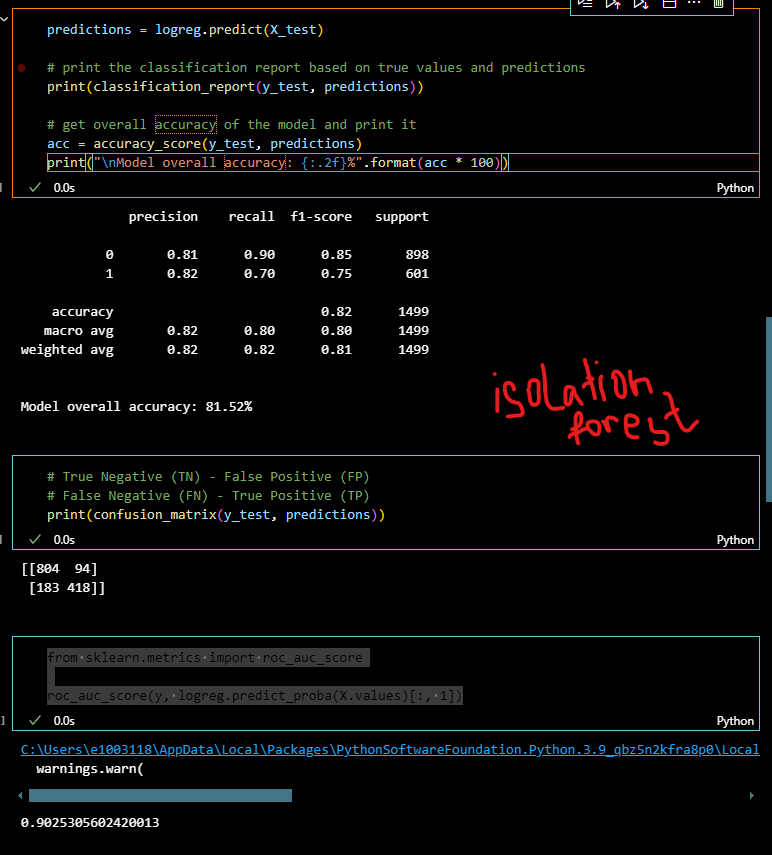